In [33]:
import random
import math
import pandas as pd
from collections import OrderedDict
from copy import deepcopy



In [34]:
# simluates a roll of dice
# dice to be kept retain their value, only those nulled (set to 0) will be rolled
def roll(curr_dice):
    i = 0
    for i in range(len(curr_dice)):
        if curr_dice[i]==0:
            curr_dice[i]= random.randint(1,6) 
    return curr_dice

In [35]:
def evaluate_roll(dice_state,counts):
    
    
    evaluation = OrderedDict({
     "is_3_of_a_kind": (0) ,  
     "is_4_of_a_kind": (0) ,      
     "isFullHouse": (0) ,  
     "isSmallStraight": (0) ,  
     "isLargeStraight": (0) , 
     "isYahtzee": (0) ,
     "sum_of_dice" : (0)
     })
    
    evaluation["sum_of_dice"] = sum(dice_state)
    
    is_3_of_a_kind=0
    is_4_of_a_kind=0
    isFullHouse=0
    isSmallStraight=0
    isLargeStraight=0
    isYahtzee=0
    
    if max(counts) >= 3:
        evaluation["is_3_of_a_kind"]=1
    
    if max(counts) >= 4:
        evaluation["is_4_of_a_kind"]=1
        
    if 3 in counts and 2 in counts:
        evaluation["isFullHouse"]=1
    
    if (math.prod(counts[0:4]) or math.prod(counts[1:5]) or math.prod(counts[2:6])) and math.prod(counts) == 0:
        evaluation["isSmallStraight"]=1
    
    if max(counts) == 1 and ( counts[0] == 0 or counts[5] == 0 ):
        evaluation["isLargeStraight"]=1
    
    if max(counts) == 5:
        evaluation["isYahtzee"]=1
    
    return evaluation
    
    

In [37]:
def first_roll_decision(counts,first_roll,first_roll_evaluation):

    for_second_roll=deepcopy(first_roll)

    ## only 1 double
    if max(counts)==1 and first_roll_evaluation["isSmallStraight"]==0:
        #print("no dupes ")
        if max(first_roll) >= 4:
            for i in range(5):
                if first_roll[i] != first_roll.index(max(first_roll)):
                    for_second_roll[i]=0
                    
            
        else:
            for_second_roll=[0,0,0,0,0]
            for i in range(len(first_roll)):
                if counts[first_roll[i]-1] != 2:
                    for_second_roll[i]=0     

    ## only 1 double
    if counts.count(2)==1 and max(counts)==2:
        #print("only 1 double")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if counts[first_roll[i]-1] != 2:
                for_second_roll[i]=0     

      ## almost have full house
    if counts.count(2)==2 and game_score['fullHouse'][0]==0:
        #print("almost full house - go for full house")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if counts[first_roll[i]-1] != 2:
                for_second_roll[i]=0              

      ## two sets doubles
    if counts.count(2)==2 and game_score['fullHouse'][0]==1:
        #print("two doubles - pick one")
        for_second_roll=deepcopy(first_roll)
        for i in range(6,0,-1):
            if first_roll.count(i)==2:
                #print (i)
                if list(game_score.items())[i-1][1][0]==0:
                    for j in range(5):
                        if for_second_roll[j] != i:
                            for_second_roll[j] =0

                    break
        

      ## have 3 of a kind, but try for yahtzee
    if first_roll_evaluation["is_3_of_a_kind"]:
        #print("3_of_a_kind")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if for_second_roll[i] != counts.index(max(counts))+1:
                for_second_roll[i]=0

      ## have 4 of a kind, but try for yahtzee
    if first_roll_evaluation["is_4_of_a_kind"]:
        #print("4_of_a_kind")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if for_second_roll[i] != counts.index(max(counts))+1:
                for_second_roll[i]=0



        ############################################################
        ## overrides for high ticket items already achieved.......##
        ############################################################

    # if Full house and don't have one already, will keep
    if first_roll_evaluation["isFullHouse"]:
        #print("fullHouse")
        if game_score["fullHouse"][0] == 0:
            for_second_roll = deepcopy(first_roll)


    # if small straight, then keep the small straight portion, but why not try for large straight??
    if first_roll_evaluation["isSmallStraight"] and game_score["smallStraight"][0] == 0:
        #print("SmallStraight")
        
        if math.prod(counts[0:4]):
            for_second_roll=deepcopy(first_roll)
            # see if there is a 6
            try:
                index_value = first_roll.index(6)
            except ValueError:
                index_value = -1
            if index_value > 0:
                for_second_roll[first_roll.index(6)]=0
            else:
                for i in [1, 2, 3, 4]:
                    if counts[i-1]==2:
                        for_second_roll[first_roll.index(i)]=0

        if math.prod(counts[1:5]):
            for_second_roll=deepcopy(first_roll)
            for i in [2, 3, 4, 5]:
                if counts[i-1]==2:
                    for_second_roll[first_roll.index(i)]=0

        if math.prod(counts[2:6]):
            for_second_roll=deepcopy(first_roll)
            # see if there is a 1
            try:
                index_value = first_roll.index(1)
            except ValueError:
                index_value = -1
            if index_value > 0:
                for_second_roll[first_roll.index(1)]=0
            else:
                for i in [3, 4, 5, 6]:
                    if counts[i-1]==2:
                        for_second_roll[first_roll.index(i)]=0

                        
                        
                        

    #if large straight, then keep unless we already have one
    if first_roll_evaluation["isLargeStraight"]:
        #print("LargeStraight")
        if game_score["largeStraight"][0] == 0:
            for_second_roll = deepcopy(first_roll)
            
        #large straight is also a small straight, so unless we already have small straight
        if game_score["smallStraight"][0] == 0:
            for_second_roll = deepcopy(first_roll)

    return for_second_roll
            
            
    #first of all, if yahtzee, then keep
    if first_roll_evaluation["isYahtzee"]:
        #print("Yahtzee")
        for_second_roll = deepcopy(first_roll)



    
    return for_second_roll

In [38]:
def second_roll_decision(counts2,second_roll,second_roll_evaluation):
    for_third_roll = first_roll_decision(counts2,second_roll,second_roll_evaluation)
    return for_third_roll


In [39]:
def one_game():
    pre_score = OrderedDict({
      "upper_1": (0,0) ,
      "upper_2": (0,0) ,
      "upper_3": (0,0) ,
      "upper_4": (0,0) ,
      "upper_5": (0,0) , 
      "upper_6": (0,0) ,  
      "threeOfAKind": (0,0) ,  
      "fourOfAKind": (0,0) ,      
      "fullHouse": (0,0) ,  
      "smallStraight": (0,0) ,  
      "largeStraight": (0,0) ,  
      "chance": (0,0) ,  
      "yahtzee": (0,0) ,  
      "yahtzee_bonus": (0,0),
       "upper_score": (0),
       "upper_bonus": (0,0),
       "bottom_score": (0),
       "total_score": (0)
    })


    global game_score
    
    game_score=deepcopy(pre_score)
    round_count=0
    upper_score=0
    upper_bonus=0
    bottom_score=0
    force_first_round=0
    force_first_round_result=[5,6,6,6,6]

    counts= [0] * 6
    counts2= [0] * 6
    counts3= [0] * 6

    for z in range(13):
        round_count=round_count+1

        ##################
        ## first  roll  ##
        ##################

        first_roll = roll([0,0,0,0,0])
        #print(first_roll)

        for i in range(6):
            counts[i] = first_roll.count(i+1)


        first_roll_evaluation = evaluate_roll(first_roll,counts)

        for_second_roll=[0,0,0,0,0]

        for_second_roll = first_roll_decision(counts,first_roll,first_roll_evaluation)


        ##################
        ## second roll  ##
        ##################

        second_roll=roll(for_second_roll[:])
        #print(second_roll)

        for i in range(6):
            counts2[i] = second_roll.count(i+1)

        second_roll_evaluation = evaluate_roll(second_roll,counts2)

        for_third_roll=[0,0,0,0,0]

        for_third_roll = second_roll_decision(counts2,second_roll,second_roll_evaluation)


        ##################
        ## second roll  ##
        ##################



        if force_first_round==1:
            third_roll=force_first_round_result
        else:
            third_roll=roll(for_third_roll[:])

        #print(third_roll)

        for i in range(6):
            counts3[i] = third_roll.count(i+1)

        third_roll_evaluation = evaluate_roll(third_roll,counts3)




        ############################
        ## select score for round ##
        ############################



          # if have yahtzee then add  yahtzee bonus, but is also scored elsewhere, too
        if game_score['yahtzee'][1]==50:
            if third_roll_evaluation["isYahtzee"]:
                #bonus yahtzee
                game_score['yahtzee_bonus'] = (game_score['yahtzee_bonus'][0]+1,game_score['yahtzee_bonus'][1]+100)
    

                #also score yahtzee joker rules (original rules)
                third_roll_evaluation["isLargeStraight"]=1
                third_roll_evaluation["isSmallStraight"]=1
                third_roll_evaluation["isFullHouse"]=1

        if third_roll_evaluation["isYahtzee"] and game_score['yahtzee'][0]==0:
            game_score['yahtzee']=(1,50)
            #print('Yahtzee')

        elif  third_roll_evaluation["isLargeStraight"] and game_score['largeStraight'][0]==0:
            game_score['largeStraight']=(1,40)
            #print('large straight')

        elif  third_roll_evaluation["isSmallStraight"] and game_score['smallStraight'][0]==0:
            game_score['smallStraight']=(1,30)
            #print('small straight')

        elif  third_roll_evaluation["isFullHouse"] and game_score['fullHouse'][0]==0:
            game_score['fullHouse']=(1,25)
            #print('full house')

        elif  third_roll_evaluation["is_4_of_a_kind"] and game_score['fourOfAKind'][0]==0 and third_roll_evaluation["sum_of_dice"] > 10:
            game_score['fourOfAKind']=(1,third_roll_evaluation["sum_of_dice"])
            #print('four of a kind')

        elif  third_roll_evaluation["is_3_of_a_kind"] and  list(game_score.items())[counts3.index(max(counts3))][1][0] ==0:
            game_score[list(game_score.items())[counts3.index(max(counts3))][0]]=(1,(counts3.index(max(counts3))+1)*max(counts3))
            #print('upper - ' + str(counts3.index(max(counts3))+1))

        elif  third_roll_evaluation["is_3_of_a_kind"] and third_roll_evaluation["sum_of_dice"] > 16 and game_score['threeOfAKind'][0]==0:
            game_score['threeOfAKind']=(1,third_roll_evaluation["sum_of_dice"])
            #print('three of a kind')



        elif third_roll.count(1) ==2 and game_score["upper_1"][0]==0:
            game_score["upper_1"]=(1,2)
            #print ("upper 1")

        elif third_roll.count(2) ==2 and game_score["upper_2"][0]==0:
            game_score["upper_2"]=(1,4)
            #print ("upper 2")

        elif third_roll.count(3) ==2 and game_score["upper_3"][0]==0:
            game_score["upper_3"]=(1,6)
            #print ("upper 3")

        elif third_roll.count(4) ==2 and game_score["upper_4"][0]==0:
            game_score["upper_4"]=(1,8)
            #print ("upper 4")

        elif third_roll.count(5) ==2 and game_score["upper_5"][0]==0:
            game_score["upper_5"]=(1,10)
            #print ("upper 5")

        elif third_roll.count(6) ==2 and game_score["upper_6"][0]==0:
            game_score["upper_6"]=(1,12)
            #print ("upper 6")


            #Chance 1
        elif game_score["chance"][0]==0 and third_roll_evaluation["sum_of_dice"] > 16:
            game_score['chance']=(1,third_roll_evaluation["sum_of_dice"])
            #print('chance')



            #nowhere else to put it, 0 in for Large Straight
        elif game_score["largeStraight"][0]==0:
            game_score['largeStraight']=(1,0)
            #print('large straight scratch')

            #nowhere else to put it, 0 in for Small  Straight
        elif game_score["smallStraight"][0]==0:
            game_score['smallStraight']=(1,0)
            #print('small straight scratch')

            #Chance 2
        elif game_score["chance"][0]==0:
            game_score['chance']=(1,third_roll_evaluation["sum_of_dice"])
            #print('chance')

            #scratch fourOfAKind
        elif game_score["fourOfAKind"][0]==0:
            game_score['fourOfAKind']=(1,0)
            #print('fourOfAKind scratch')

            #scratch yahtzee
        elif game_score["threeOfAKind"][0]==0:
            game_score['threeOfAKind']=(1,0)
            #print('threeOfAKind scratch')



        ###########################################
        elif game_score["upper_1"][0]==0:
            game_score['upper_1']=(1,third_roll.count(1))
            #print('upper_1')
        ###########################################




        elif game_score["upper_2"][0]==0:
            game_score['upper_2']=(1,third_roll.count(2)*2)
            #print('upper_2')

        #######################################
            #scratch yahtzee
        elif game_score["yahtzee"][0]==0:
            game_score['yahtzee']=(1,0)
            #print('yahtzee scratch')

            #scratch fullHouse
        elif game_score["fullHouse"][0]==0:
            game_score['fullHouse']=(1,0)
            #print('fullHouse scratch')    

        ##########################################

        elif game_score["upper_3"][0]==0:
            game_score['upper_3']=(1,third_roll.count(3)*3)
            #print('upper_3')

        elif game_score["upper_4"][0]==0:
            game_score['upper_4']=(1,third_roll.count(4)*4)
            #print('upper_4')

        elif game_score["upper_5"][0]==0:
            game_score['upper_5']=(1,third_roll.count(5)*5)
            #print('upper_5')

        elif game_score["upper_6"][0]==0:
            game_score['upper_6']=(1,third_roll.count(6)*6)
            #print('upper_6')

        #game_score




            # 4x to 4 of a kind??? or upper

            # remove "go for full house"

            # if two 6's but 6's full and 3 of a kind full, don't keep 6's

        if round_count == 13:
            for i in range(6):
                upper_score = upper_score + list(game_score.items())[i][1][1]
                
            game_score['upper_score']=(upper_score)

            if upper_score >= 63:
                upper_bonus = 35
                game_score['upper_bonus']=(1,35)
                

            for i in range(6,14):
                bottom_score = bottom_score + list(game_score.items())[i][1][1]

            game_score['bottom_score']=(bottom_score)
            
            total_score = upper_score + upper_bonus + bottom_score
            
            game_score['total_score']=(total_score)
          
            

            #print ("Upper Score =   " + str(upper_score))
            #print ("Upper Bonus =    " + str(upper_bonus))
            #print ("Bottom Score =  " + str(bottom_score))
            #print ("=============== " )
            #print ("Total Score =   " + str(total_score))

    return game_score    

#### running the simulation

In [45]:
reps=250000
random.seed(8675309)
#############
#random.seed(2)
############

upper_1 = [0] * reps
upper_2 = [0] * reps
upper_3 = [0] * reps
upper_4 = [0] * reps
upper_5 = [0] * reps
upper_6 = [0] * reps
threeOfAKind = [0] * reps
fourOfAKind = [0] * reps
fullHouse = [0] * reps
smallStraight = [0] * reps
largeStraight = [0] * reps
chance = [0] * reps
yahtzee = [0] * reps
yahtzee_bonus = [0] * reps
upper_score = [0] * reps
upper_bonus = [0] * reps
bottom_score = [0] * reps
total_score = [0] * reps
upper_bonus_flag = [0] * reps
threeOfAKind_flag = [0] * reps
fourOfAKind_flag = [0] * reps
fullHouse_flag = [0] * reps
smallStraight_flag = [0] * reps
largeStraight_flag = [0] * reps
yahtzee_flag = [0] * reps
yahtzee_bonus_flag = [0] * reps

In [46]:
for j in range(reps):
    result=one_game()
    
    upper_1[j]=result["upper_1"][1]
    upper_2[j]=result["upper_2"][1]
    upper_3[j]=result["upper_3"][1]
    upper_4[j]=result["upper_4"][1]
    upper_5[j]=result["upper_5"][1]
    upper_6[j]=result["upper_6"][1]
    threeOfAKind[j]=result["threeOfAKind"][1]
    fourOfAKind[j]=result["fourOfAKind"][1]
    fullHouse[j]=result["fullHouse"][1]
    smallStraight[j]=result["smallStraight"][1]
    largeStraight[j]=result["largeStraight"][1]
    chance[j]=result["chance"][1]
    yahtzee[j]=result["yahtzee"][1]
    yahtzee_bonus[j]=result["yahtzee_bonus"][1]
    upper_score[j]=result["upper_score"]
    upper_bonus[j]=result["upper_bonus"][1]
    bottom_score[j]=result["bottom_score"]
    total_score[j]=result["total_score"]
    upper_bonus_flag[j]=result["upper_bonus"][0]

    if result["threeOfAKind"][1] > 0:
        threeOfAKind_flag[j]=1

    if result["fourOfAKind"][1] > 0:
        fourOfAKind_flag[j]=1

    if result["fullHouse"][1] > 0:
        fullHouse_flag[j]=1

    if result["smallStraight"][1] > 0:
        smallStraight_flag[j]=1

    if result["largeStraight"][1] > 0:
        largeStraight_flag[j]=1

    if result["yahtzee"][1] > 0:
        yahtzee_flag[j]=1

    yahtzee_bonus_flag[j]=result["yahtzee_bonus"][0]
   

In [47]:
resultDict=OrderedDict(
{
'upper_1':upper_1,
'upper_2':upper_2,
'upper_3':upper_3,
'upper_4':upper_4,
'upper_5':upper_5,
'upper_6':upper_6,
'threeOfAKind':threeOfAKind,
'fourOfAKind':fourOfAKind,
'fullHouse':fullHouse,
'smallStraight':smallStraight,
'largeStraight':largeStraight,
'chance':chance,
'yahtzee':yahtzee,
'yahtzee_bonus':yahtzee_bonus,
'upper_score':upper_score,
'upper_bonus':upper_bonus,
'bottom_score':bottom_score,
'total_score':total_score,
'upper_bonus_flag':upper_bonus_flag,
'threeOfAKind_flag':threeOfAKind_flag,
'fourOfAKind_flag':fourOfAKind_flag,
'fullHouse_flag':fullHouse_flag,
'smallStraight_flag':smallStraight_flag,
'largeStraight_flag':largeStraight_flag,
'yahtzee_flag':yahtzee_flag,
'yahtzee_bonus_flag':yahtzee_bonus_flag
    
    
})

In [48]:
results = pd.DataFrame.from_dict(resultDict)

In [49]:
results.describe()

,upper_1,upper_2,upper_3,upper_4,upper_5,upper_6,threeOfAKind,fourOfAKind,fullHouse,smallStraight,...,bottom_score,total_score,upper_bonus_flag,threeOfAKind_flag,fourOfAKind_flag,fullHouse_flag,smallStraight_flag,largeStraight_flag,yahtzee_flag,yahtzee_bonus_flag
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.471240,4.706072,7.236408,9.848608,12.567420,15.440592,13.627976,16.741948,24.754400,23.407680,...,142.57010,199.954920,0.146128,0.626444,0.831968,0.990176,0.780256,0.425300,0.386108,0.102072
std,1.138871,2.224243,3.184995,4.230972,5.239195,6.180955,10.838424,8.973279,2.465706,12.422219,...,59.02338,62.569134,0.353235,0.483749,0.373895,0.098628,0.414074,0.494389,0.486857,0.349316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.00000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,6.000000,8.000000,10.000000,12.000000,0.000000,13.000000,25.000000,30.000000,...,105.00000,159.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,9.000000,12.000000,15.000000,18.000000,18.000000,18.000000,25.000000,30.000000,...,130.00000,188.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,6.000000,9.000000,12.000000,15.000000,18.000000,23.000000,24.000000,25.000000,30.000000,...,163.00000,223.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,10.000000,15.000000,20.000000,25.000000,30.000000,30.000000,30.000000,25.000000,30.000000,...,704.00000,753.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [50]:
results.to_csv('iter1.csv')

In [51]:
results.describe().to_csv('describe_it_1_.csv')

In [52]:
x_axis = [0] * reps
y_axis = [0] * reps


for i in range(reps):
    x_axis[i]=i+1
    y_axis[i] = round(sum(results['total_score'].tolist()[0:i+1]) / (i+1),2)
 

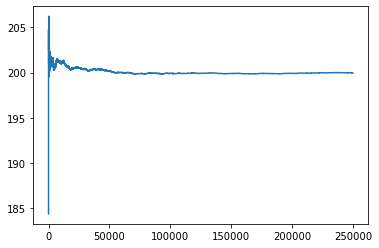

In [53]:
   
import matplotlib.pyplot as plt

plt.plot(x_axis[10:], y_axis[10:])
plt.show()

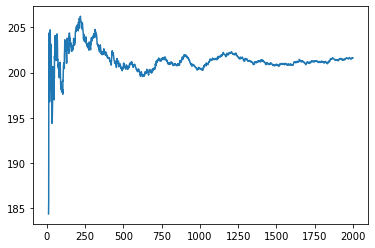

In [54]:


plt.plot(x_axis[10:2000], y_axis[10:2000])
plt.show()

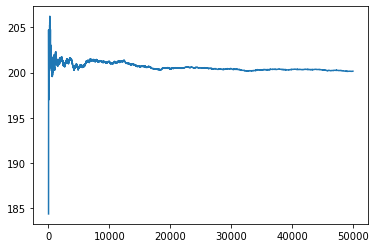

In [72]:


plt.plot(x_axis[10:50000], y_axis[10:50000])
plt.show()

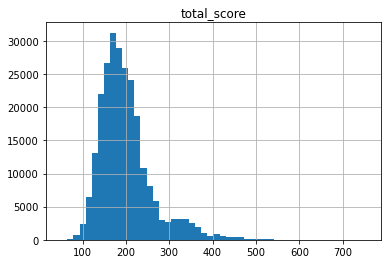

In [55]:
hist = results.hist(column='total_score',bins=50)

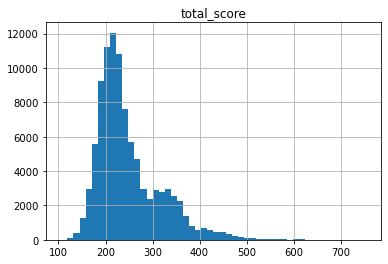

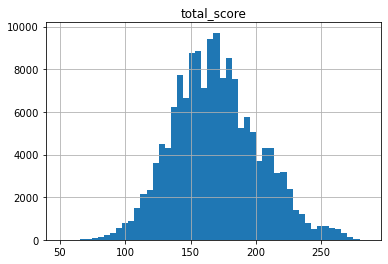

In [56]:
hist = results[results["yahtzee_flag"] > 0].hist(column='total_score',bins=50)
hist = results[results["yahtzee_flag"] == 0].hist(column='total_score',bins=50)


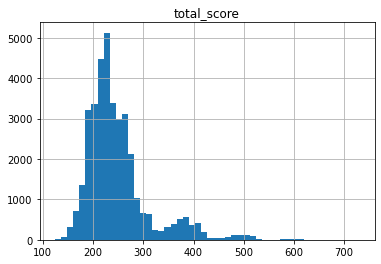

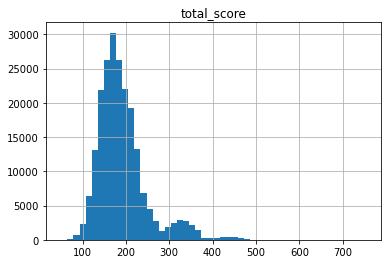

In [57]:
hist = results[results["upper_bonus_flag"] == 1].hist(column='total_score',bins=50)
hist = results[results["upper_bonus_flag"] == 0].hist(column='total_score',bins=50)


array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

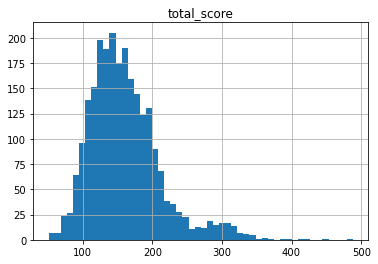

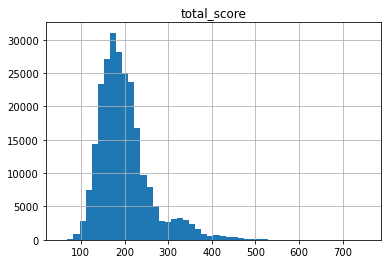

In [58]:
results[results["fullHouse_flag"] == 0].hist(column='total_score',bins=50)
results[results["fullHouse_flag"] == 1].hist(column='total_score',bins=50)


array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

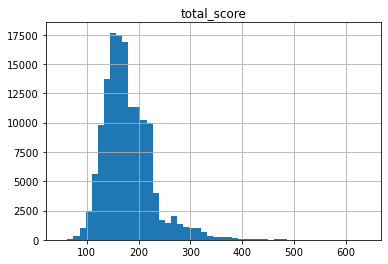

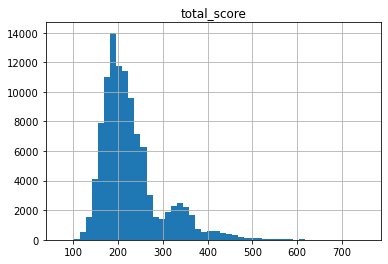

In [59]:
results[results["largeStraight_flag"] == 0].hist(column='total_score',bins=50)
results[results["largeStraight_flag"] == 1].hist(column='total_score',bins=50)

array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

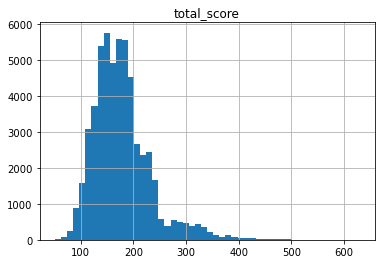

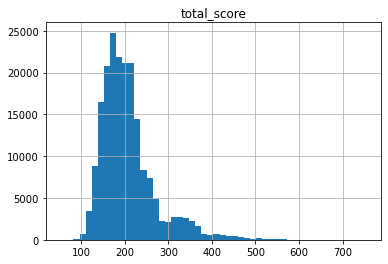

In [60]:
results[results["smallStraight_flag"] == 0].hist(column='total_score',bins=50)
results[results["smallStraight_flag"] == 1].hist(column='total_score',bins=50)

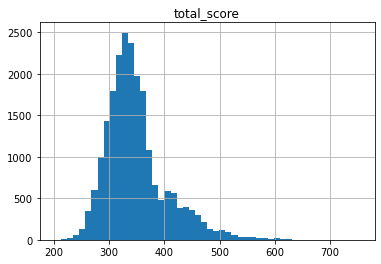

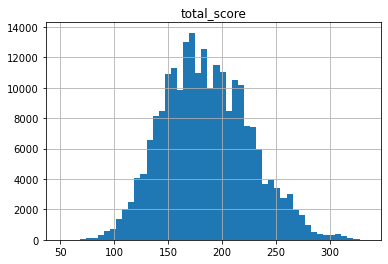

In [61]:
hist = results[results["yahtzee_bonus_flag"] > 0].hist(column='total_score',bins=50)
hist = results[results["yahtzee_bonus_flag"] == 0].hist(column='total_score',bins=50)


In [62]:
results[results["yahtzee_bonus_flag"] > 0].to_csv('bouns_iter1.csv')

In [63]:
results[results["total_score"] <=70].to_csv('terrible_1.csv')

In [64]:
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy.stats import normaltest

import random                       
import warnings   


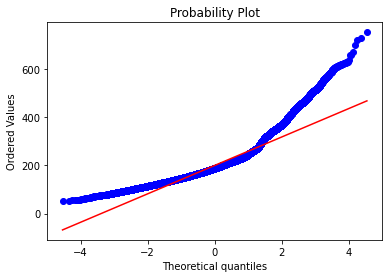

C:\Users\aben_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


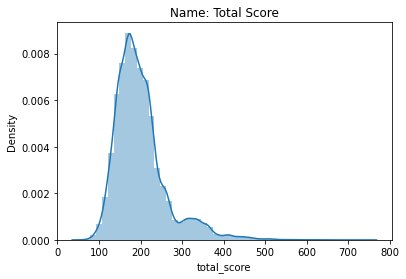

stat=78522.072, p=0.000



In [65]:
to_test=results["total_score"]

stats.probplot(to_test, dist='norm', plot=pylab)
pylab.show()
ax = sns.distplot(to_test)
ax.set_title(f'Name: Total Score')
pylab.show()

stat,p = normaltest(to_test)
print('stat=%.3f, p=%.3f\n' % (stat, p))

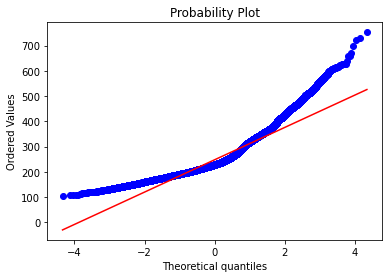

C:\Users\aben_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


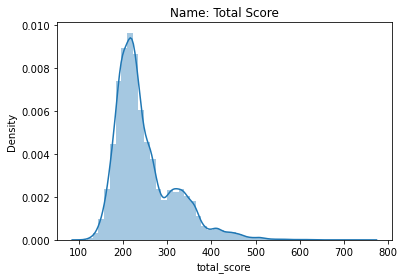

stat=22590.517, p=0.000



In [66]:
to_test=results[results["yahtzee_flag"] > 0]["total_score"]

stats.probplot(to_test, dist='norm', plot=pylab)
pylab.show()
ax = sns.distplot(to_test)
ax.set_title(f'Name: Total Score')
pylab.show()

stat,p = normaltest(to_test)
print('stat=%.3f, p=%.3f\n' % (stat, p))

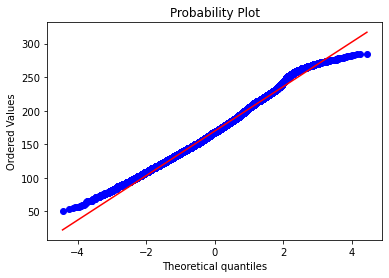

C:\Users\aben_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


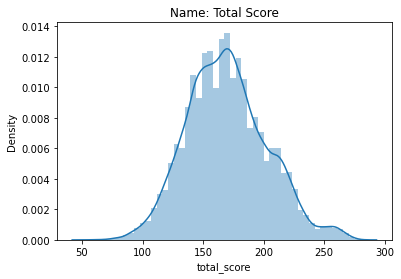

stat=2029.694, p=0.000



In [67]:
to_test=results[results["yahtzee_flag"] == 0]["total_score"]

stats.probplot(to_test, dist='norm', plot=pylab)
pylab.show()
ax = sns.distplot(to_test)
ax.set_title(f'Name: Total Score')
pylab.show()

stat,p = normaltest(to_test)
print('stat=%.3f, p=%.3f\n' % (stat, p))

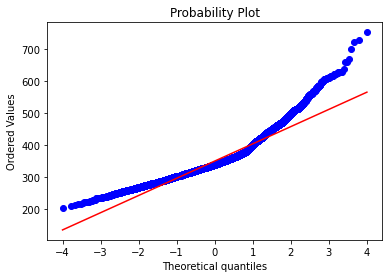

C:\Users\aben_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


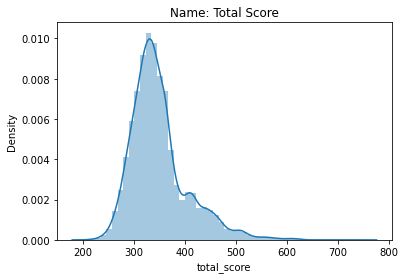

stat=5184.619, p=0.000



In [68]:
to_test=results[results["yahtzee_bonus_flag"] > 0]["total_score"]

stats.probplot(to_test, dist='norm', plot=pylab)
pylab.show()
ax = sns.distplot(to_test)
ax.set_title(f'Name: Total Score')
pylab.show()

stat,p = normaltest(to_test)
print('stat=%.3f, p=%.3f\n' % (stat, p))

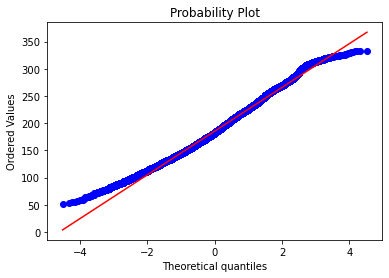

C:\Users\aben_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


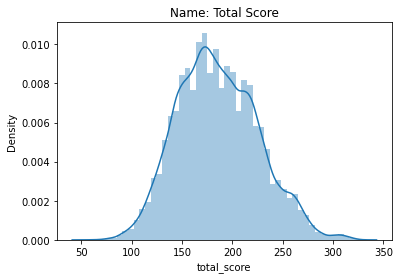

stat=3210.039, p=0.000



In [69]:
to_test=results[results["yahtzee_bonus_flag"] == 0]["total_score"]

stats.probplot(to_test, dist='norm', plot=pylab)
pylab.show()
ax = sns.distplot(to_test)
ax.set_title(f'Name: Total Score')
pylab.show()

stat,p = normaltest(to_test)
print('stat=%.3f, p=%.3f\n' % (stat, p))